In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix

import seaborn as sns

import mglearn


In [2]:
#wine_q = pd.read_csv("wine-quality_preprocessed.csv")
wine_q = pd.read_csv("wine-quality_preprocessed_fulldata.csv")
print("Data dim:",wine_q.shape)
wine_q.head()


Data dim: (5295, 15)


,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,logit_score
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


In [3]:
#split data train-test, balance based on logit_score
X= wine_q[wine_q.columns.difference(['logit_score','type','quality','Unnamed: 0'])]
y = wine_q.logit_score
X_train, X_test, y_train, y_test =     train_test_split(X, y, test_size=0.20, random_state=42, stratify= wine_q.logit_score)
print("Train Dim:",X_train.shape)
print("Test Dim:",X_test.shape)

Train Dim: (4236, 11)
Test Dim: (1059, 11)


In [4]:
X.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,8.8,0.045,0.36,1.0010,7.0,45.0,3.00,20.7,0.45,170.0,0.27
1,9.5,0.049,0.34,0.9940,6.3,14.0,3.30,1.6,0.49,132.0,0.30
2,10.1,0.050,0.40,0.9951,8.1,30.0,3.26,6.9,0.44,97.0,0.28
3,9.9,0.058,0.32,0.9956,7.2,47.0,3.19,8.5,0.40,186.0,0.23
4,9.6,0.045,0.16,0.9949,6.2,30.0,3.18,7.0,0.47,136.0,0.32


In [5]:
print("Percentage of Good Wines:",np.sum(y_test)/y_test.shape[0]*100,"%")
print("Percentage of Bad Wines:",np.count_nonzero(y_test==0)/y_test.shape[0]*100,"%")


Percentage of Good Wines: 18.980169971671387 %
Percentage of Bad Wines: 81.01983002832861 %


In [6]:
def correlation_plot(data):
    corr=data.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(data.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.columns)
    plt.show()
    return corr

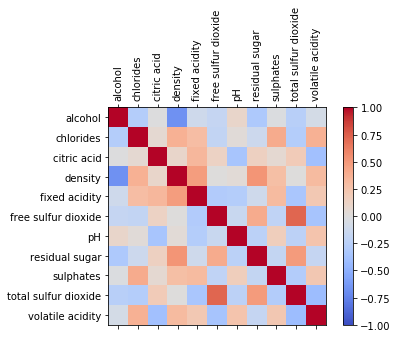

In [7]:
corr = correlation_plot(X)

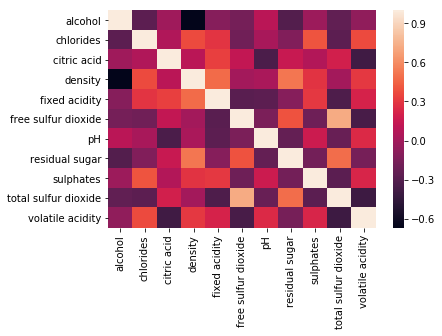

In [8]:
# plot the heatmap
tmp=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [9]:
#Logistic Regression Model
model_lr = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr')
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Acc:",acc*100,"%")

print("Predictor Coefficients:\n",model_lr.coef_)

print("\nTN","FP\n")
print("FN","TP")
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred, labels=None, sample_weight=None))

Logistic Regression Acc: 82.05854579792256 %
Predictor Coefficients:
 [[ 0.8898542  -1.73497466  0.32888556 -4.5567554  -0.0797713   0.02057504
  -0.4070547   0.00977405  1.54009237 -0.00703086 -2.93345602]]

TN FP

FN TP
Confusion Matrix:
 [[826  32]
 [158  43]]


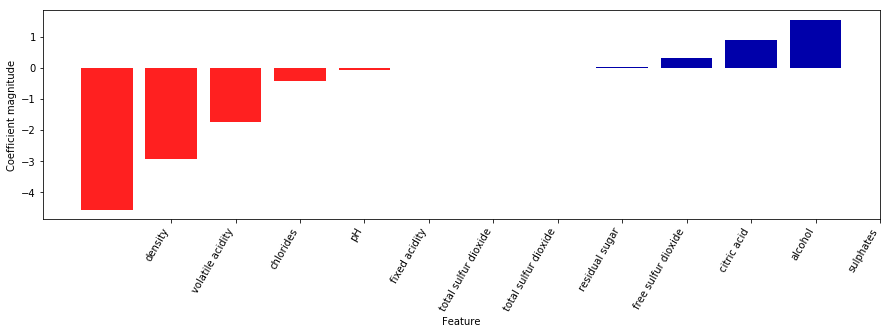

In [10]:
feature_names =X.columns.tolist()
mglearn.tools.visualize_coefficients(model_lr.coef_, feature_names,n_top_features=6)
plt.savefig("wine_quality_coeff.png", dpi = 250, bbox_inches = 'tight')

In [11]:
#Logistic Regression with Cross Validation
model_lr_cv = LogisticRegressionCV(cv=5, random_state=42, solver='liblinear',multi_class='ovr')
model_lr_cv.fit(X_train, y_train)

y_pred = model_lr_cv.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Logistic Regression w. CV Acc:",acc*100,"%")
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred, labels=None, sample_weight=None))

Logistic Regression w. CV Acc: 82.43626062322946 %
Confusion Matrix:
 [[824  34]
 [152  49]]


# Visualization Repo
https://github.com/amueller/mglearn/blob/master/mglearn/tools.py



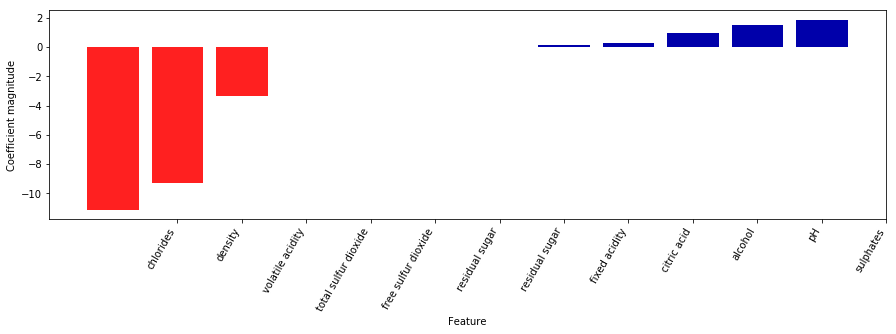

In [12]:
feature_names =X.columns.tolist()
mglearn.tools.visualize_coefficients(model_lr_cv.coef_, feature_names,n_top_features=6)
#plt.savefig("wine_quality_coeff_lr_cv.png", dpi = 250, bbox_inches = 'tight')

In [28]:
#SVM
model_svm = svm.LinearSVC(multi_class='ovr', penalty='l2',C=1, random_state=42,max_iter=5000)
model_svm.fit(X_train,y_train)

y_pred = model_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("SVM Acc:",acc*100,"%")
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred, labels=None, sample_weight=None))

SVM Acc: 81.49197355996223 %
Confusion Matrix:
 [[852   6]
 [190  11]]


/usr/share/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
